### 🧠 Brain Tumor Classification Using DenseNet201: A Deep Learning Approach 🚀

#### Import necessary libraries


In [1]:
# NumPy is used for numerical operations and handling arrays
import numpy as np  

# Pandas is used for data manipulation and analysis
import pandas as pd  

# Matplotlib is used for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt  

# OS module is used for interacting with the operating system, including file and directory operations
import os  


# Deep learning framework
import tensorflow as tf  

# One-hot encoding for labels
from tensorflow.keras.utils import to_categorical  

# Image loading and augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Splitting data into training and validation sets
from sklearn.model_selection import train_test_split  

# Evaluation metric
from sklearn.metrics import classification_report  

#### Define the file paths for the training and testing datasets


In [2]:
train_path = "D:/Skill VERTEX/Artificial Intelligence Program/Datasets/Brain Tumor/Training"
test_path = "D:/Skill VERTEX/Artificial Intelligence Program/Datasets/Brain Tumor/Testing"

In [3]:
# Initialize an empty list to store the filenames
File = []

# Loop through all files in the training directory
for f in os.listdir(train_path):
    # Add each filename to the list 'File'
    File += [f]

# Print the list of filenames in the training directory
print(File)

['glioma', 'meningioma', 'notumor', 'pituitary']


#### Initialize lists to store the training and testing data


In [4]:
train_data = []
test_data = []

In [5]:
# Dictionary to map folder names to numeric labels
mapping = {'no_tumor': 0, 'pituitary_tumor': 1, 'meningioma_tumor': 2, 'glioma_tumor': 3}

# Load and preprocess the training data
for label, folder in enumerate(os.listdir(train_path)):
    folder_path = os.path.join(train_path, folder)
    for img_name in os.listdir(folder_path):
        img = load_img(os.path.join(folder_path, img_name), target_size=(150, 150))
        img_array = img_to_array(img) / 255.0  # Normalize the image data
        train_data.append([img_array, label])

# Load and preprocess the testing data
for label, folder in enumerate(os.listdir(test_path)):
    folder_path = os.path.join(test_path, folder)
    for img_name in os.listdir(folder_path):
        img = load_img(os.path.join(folder_path, img_name), target_size=(150, 150))
        img_array = img_to_array(img) / 255.0  # Normalize the image data
        test_data.append([img_array, label])

# Shuffle the training data
np.random.shuffle(train_data)

#### Separate features and labels for training and testing data


In [6]:
train_images, train_labels = zip(*train_data)
test_images, test_labels = zip(*test_data)

#### Convert lists to NumPy arrays


In [7]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#### One-hot encode the labels


In [8]:
train_labels = to_categorical(train_labels, num_classes=4)
test_labels = to_categorical(test_labels, num_classes=4)

#### Split the training data into training and validation sets


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    train_images,  # Features for training
    train_labels,  # Labels for training
    test_size=0.2,  # Proportion of the dataset to include in the validation split
    random_state=0  # Seed for the random number generator to ensure reproducibility
)

#### Initialize the ImageDataGenerator for data augmentation


In [10]:
data_aug = ImageDataGenerator(
    # Randomly flip images horizontally
    horizontal_flip=True,
    
    # Randomly shift images horizontally within the range of 20% of the image width
    width_shift_range=0.2,
    
    # Randomly shift images vertically within the range of 20% of the image height
    height_shift_range=0.2,
    
    # Apply shear transformation with a range of 10%
    shear_range=0.1
)

#### Load the DenseNet201 model with pre-trained weights


In [11]:
base_model = tf.keras.applications.DenseNet201(
    input_shape=(150, 150, 3), 
    include_top=False,  # Do not include the fully connected top layers
    weights='imagenet'  # Use pre-trained weights from ImageNet
)

base_model.trainable = False  # Freeze the base model layers

#### Add custom layers on top of the base model


In [12]:
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output = tf.keras.layers.Dense(4, activation='softmax')(x)

In [13]:
# Define the final model
model = tf.keras.Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Use categorical crossentropy loss for multi-class classification
    optimizer='adam',  # Use Adam optimizer
    metrics=['accuracy']  # Track accuracy during training
)

#### Train the model

In [14]:
history = model.fit(
    data_aug.flow(X_train, y_train, batch_size=32),  # Data augmentation and training
    epochs = 30,  # Number of epochs
    validation_data=(X_test, y_test)  # Validation data
)

Epoch 1/30
143/143 [==============================] - 561s 4s/step - loss: 0.5298 - accuracy: 0.7947 - val_loss: 0.4707 - val_accuracy: 0.8373
Epoch 2/30
143/143 [==============================] - 517s 4s/step - loss: 0.3095 - accuracy: 0.8840 - val_loss: 0.4224 - val_accuracy: 0.8618
Epoch 3/30
143/143 [==============================] - 517s 4s/step - loss: 0.2584 - accuracy: 0.9065 - val_loss: 0.3285 - val_accuracy: 0.8705
Epoch 4/30
143/143 [==============================] - 524s 4s/step - loss: 0.2464 - accuracy: 0.9105 - val_loss: 0.4622 - val_accuracy: 0.8495
Epoch 5/30
143/143 [==============================] - 573s 4s/step - loss: 0.2125 - accuracy: 0.9184 - val_loss: 0.2602 - val_accuracy: 0.9151
Epoch 6/30
143/143 [==============================] - 605s 4s/step - loss: 0.1895 - accuracy: 0.9306 - val_loss: 0.3557 - val_accuracy: 0.8679
Epoch 7/30
143/143 [==============================] - 613s 4s/step - loss: 0.1877 - accuracy: 0.9295 - val_loss: 0.2148 - val_accuracy: 0.9178

#### Evaluate the model

In [17]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_pred, axis=1)

36/36 [==============================] - 136s 4s/step


#### Generate a classification report


In [18]:
print(classification_report(y_true_labels, y_pred_labels, target_names=list(mapping.keys())))

                  precision    recall  f1-score   support

        no_tumor       1.00      1.00      1.00       260
 pituitary_tumor       1.00      1.00      1.00       236
meningioma_tumor       1.00      1.00      1.00       313
    glioma_tumor       1.00      1.00      1.00       334

        accuracy                           1.00      1143
       macro avg       1.00      1.00      1.00      1143
    weighted avg       1.00      1.00      1.00      1143



#### Plot training and validation accuracy


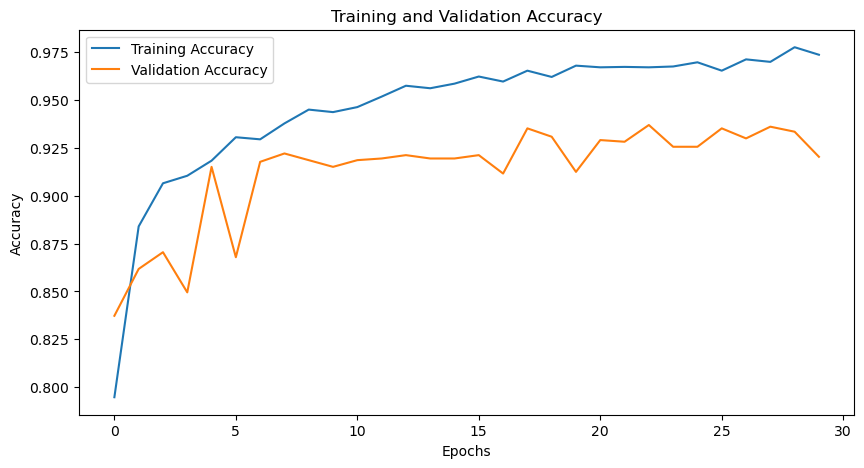

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Plot training and validation loss


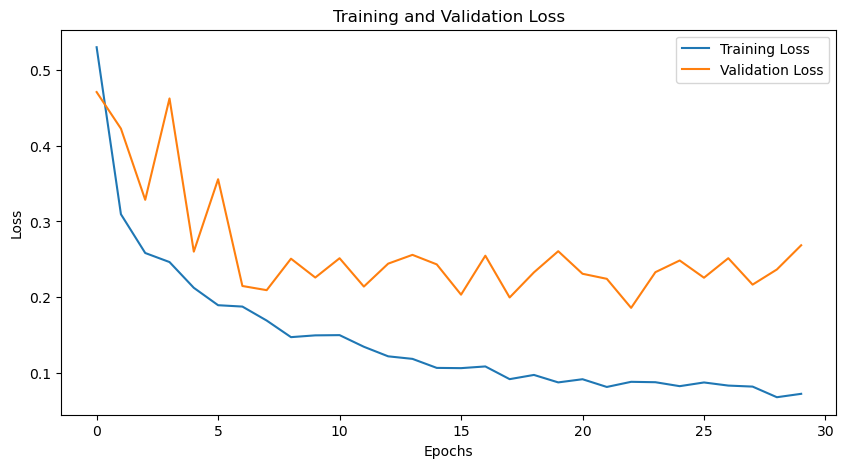

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Test the model on a sample image


In [21]:
sample_img_path = os.path.join(test_path, 'meningioma', 'Te-me_0027.jpg')
sample_img = load_img(sample_img_path, target_size=(150, 150))
sample_img_array = img_to_array(sample_img) / 255.0
sample_img_array = np.expand_dims(sample_img_array, axis=0)

#### Display the sample image


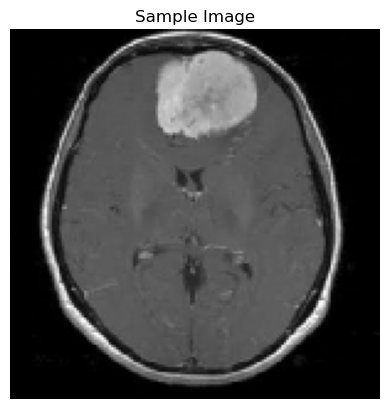

In [22]:
plt.imshow(sample_img)
plt.title('Sample Image')
plt.axis('off')
plt.show()

#### Make a prediction on the sample image


In [29]:
# Assuming mapping is defined like this
mapping = {
    0: 'no_tumor',
    1: 'meningioma_tumor',
    2: 'pituitary_tumor',
    3: 'glioma_tumor'
}

pred = model.predict(sample_img_array)
pred_label = np.argmax(pred)

# Safely retrieve the predicted class from the mapping dictionary
pred_class = mapping.get(pred_label, "Unknown Class")

print(f"Prediction: {pred_class}")


1/1 [==============================] - 0s 290ms/step
Prediction: meningioma_tumor
